# Functions

## Import Functions 

In [15]:
# Use to embed images in Jupyter Notebook
from IPython.display import Image

# Importing necesary modules
import sys
import os
import glob 
from os import listdir
from pathlib import Path

# Working with arrays 
import numpy as np

# Working with fits files and WCS objects 
import astropy.units as u
from astropy.time import Time 

# plotting and drawing modules 
from matplotlib import pyplot as plt
import matplotlib as mpl

#additional libraries needed for AFINO
import scipy.optimize as opt 
import scipy.signal as sig

# import reader for IDL files 
from scipy.io import readsav as idlsave

# import stats library 
import scipy.stats as stats 

## Defined Functions

### Compute Magnetic Reconnection Flux Rate

- Remember that the definition of the magnetic reconection flux is: 
$\dot{\Phi} \approx \frac{\Phi[t_{k+1}] - \Phi[t_{k-1}]}{t_{k+1} - t_{k-1}}$
- This same operation can be achieved using numpy's [`gradient`](https://numpy.org/doc/stable/reference/generated/numpy.gradient.html) function

In [3]:
# Define Reconnection Flux Rate  
def recrate(flx,h):
    '''Compute the difference formula for f'(a) with step size h.

    Parameters
    ----------
    flx : array containing reconection flux 
    h: contant cadance beyween observations 
    Returns
    -------
    recrate: reconection flux(a+h) - reconection flux(a-h))/2h
        [negative reconnection rate, positive reconnection rate] 
    '''    
    
    recrate    = np.zeros((2,len(flx[1,:])))
    
    nflux = flx[1] 
    pflux = flx[0]
    recrate[1] = np.gradient(nflux,h,edge_order =2)
    recrate[0] = np.gradient(pflux,h,edge_order =2)
    
    return recrate

### Check Name of File
- In this case we are only checking to see it the file as formated exists within a given path

In [4]:
# Check if .sav file exists 
def check(filename,bstr,wvstr):
    '''
    Written by Marcel 
    Oct. 21, 2020
    
    inputs: 
            filename -- name of the reconnection flux idl save file
            bstr     -- 
                        BLOS - normal component taken as the line of sight
                        BRAD - normal component taken as the radial magnatic field (B_r)
            wvstr    -- 
    output: 
            savname  -- full filename with extension of the reconnection flux
    '''
    for i in range(len(bstr)): 
        if path.exists(filename+bstr[i]+wvstr+".sav" ) == True:
            return  filename+bstr[i]+wvstr+".sav"
        else: 
            print('File not found! This file does not exist.')

### Extract the Variables from the .sav file
- We use the `scipy.io` function [`readsav`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.io.readsav.html) imported here as `idlsave` to read the data in the `.sav` file creted in IDL. To access the variables within the structure you can use this fucntion or just call upon each variable with its key: `flx8 = idlstrct.flx8`. You can see all the keys of a given IDL structure object by using `idlstrct.keys()`. Notice that idlstrct is just a generic name for any IDL structure. 

In [12]:
def extract_ribbon_vars(idlstrct):
    '''
    Written by Marcel
    Oct. 5, 2020
    Inputs  --
    Outputs --  OPTIONAL (*) 
                *dosday --?
                flx6 -- magnetic reconnection flux for pixel area with I >= median(I)*6
                flx8 -- magnetic reconnection flux for pixel area with I >= median(I)*8
                flx10 -- magnetic reconnection flux for pixel area with I >= median(I)*10
                * area6 --?
                * area8 --? 
                * area10 --?
                * ar_area --? 
                * mflx --?
                tim -- UTC time from HMI 
                * cut --? 
                * sathr --? 
                * str_brad --? 
                * tim_maxnegrecrate --?    
                * tim_maxposrecrate --?       
                * maxnegrecrate --?        
                * maxposrecrate --?         
                n_o_satpix -- number of saturated points for a given AIA image          
                * bcenx6 --?               
                * bceny6 --?             
                * bcenx8 --?            
                * bceny8 --?            
                * bcenx10 --?             
                * bceny10 --?            
                * dst6 --?                
                * dst8 --?               
                * dst10 --?               

                
    
    Extract all the idl variables 
    '''
    
    flx6                = idlstrct.flx6 
    flx8                = idlstrct.flx8
    flx10               = idlstrct.flx10 
    tim                 = list(idlstrct.tim) #object arrays are not suported by python  
    n_o_satpix          = idlstrct.n_o_satpix
    # These have been commented out because they are not used in the qpp analysis 
    #dosday              = idlstrct.dosday
    area6               = idlstrct.area6 
    area8               = idlstrct.area8 
    area10              = idlstrct.area10 
    ar_area             = idlstrct.ar_area  
    #mflx                = idlstrct.mflx
    #cut                 = idlstrct.cut
    #satthr              = idlstrct.satthr
    #dflxdt              = idlstrct.dflxdt
    #str_brad            = idlstrct.str_brad

    #tim_maxnegrecrate   = idlstrct.tim_maxnegrecrate 
    #tim_maxposrecrate   = idlstrct.tim_maxposrecrate   
    #maxnegrecrate       = idlstrct.maxnegrecrate
    #maxposrecrate       = idlstrct.maxposrecrate 
    #bcenx6              = idlstrct.bcenx6
    #bceny6              = idlstrct.bceny6
    #bcenx8              = idlstrct.bcenx8
    #bceny8              = idlstrct.bceny8
    #bcenx10             = idlstrct.bcenx10
    #bceny10             = idlstrct.bceny10
    #dst6                = idlstrct.dst6
    #dst8                = idlstrct.dst8
    #dst10               = idlstrct.dst10
    
#    return dosday,flx8,flx6,flx10,area6,area8,area10,ar_area,mflx,tim,cut,satthr,dflxdt,str_brad,tim_maxnegrecrate,tim_maxposrecrate,maxnegrecrate,maxposrecrate,n_o_satpix,bcenx6,bceny6,bcenx8,bceny8,bcenx10,bceny10,dst6,dst8,dst10 
#    return dosday,flx8,flx6,flx10,area6,area8,area10,ar_area,mflx,tim,cut,satthr,str_brad,tim_maxnegrecrate,tim_maxposrecrate,maxnegrecrate,maxposrecrate,n_o_satpix,bcenx6,bceny6,bcenx8,bceny8,bcenx10,bceny10,dst6,dst8,dst10 
    return flx6,flx8,flx10,tim,n_o_satpix,area6,area8,area10,ar_area

### Extract time from RDB format
- The RDB time format has a little bug when loading it from the IDL file in Python. 
- This little routine can help you get over that hurdle. 

In [ ]:
def utc2jd(tim): 
    '''
    Written by Marcel 
    Oct. 2020
    
    Imput -- 
                tim -- UTC time from IDL sav file
    Output -- 
                jdt -- Julian days converted from UTC time  
                jst -- Julian days converted into seconds 
                js  -- Seconds from the start of the start date in Julian days
                to  -- Time Object dates in UTC-ISOT format
    '''
    jdt = list(np.zeros(len(tim)))
    jst = list(np.zeros(len(tim)))
    js  = list(np.zeros(len(tim)))
    sts = list(np.zeros(len(tim)))

    for i in range(len(tim)): 
        utcstr = str(tim[i])
        utcstr = utcstr.replace('b',"")
        utcstr = utcstr.replace("'",'') 
        sts[i] = utcstr
        jdt[i] = at.Time(utcstr,format='isot')
        jdt[i] = jdt[i].jd
        jst[i] = jdt[i] * 24 * 3600
        js[i]  = jst[i] - jst[0]
    jdt = np.array(jdt)
    jst = np.array(jst)
    js  = np.array(js)
    to  = Time(sts,scale='utc',format='isot') 
    return jdt,jst,js,to

### Define Reconection Flux/Rate related variables
- Firts extract the variables using the `extract_ribbon_vars` function 
- Define the reconnection flux `rdbflx = ` $\Phi(t) = \frac{\Phi_{10} + \Phi_{6}}{2}$
- Extract the time since the observations started recording in seconds `rdbt` and UTC format `rdbtt`, and convert the time from seconds to minutes. 
- Calculate the reconnection flux rate `rdbrflx =` $\dot{\Phi}$, using the `recrate` function

In [ ]:
def extract_RDB(flare_data):
    #extract all variables from RibbonDB IDL savefiles 
    rdbflx6,rdbflx8,rdbflx10,tim,n_o_satpix,area6,area8,area10,ar_area = extract_ribbon_vars(flare_data)
    rdbflx = (rdbflx6+rdbflx10)/2 # reconnection flux in Maxwells
   
    #changes from utc to julian calander (in seconds; see ribbon_functions.py)
    _,_,rdbt,rdbtt = utc2jd(tim)
    
    # Evaluate the reconnection rate
    #   negative recflux = rflx[0,:]    
    #   positive recflux = rflx[1,:]
    rdbrflx  = recrate(rdbflx,rdbt[1]-rdbt[0]) # reconnection rate 
                                               # in units of Maxwells per second
    
    #conversion of time to minutes
    rdbt = rdbt/60
       
    return rdbflx,rdbrflx,rdbt,rdbtt,area8,n_o_satpix,ar_area

# Selecting Data

## Define the Data Name
- Define the date of one of the .sav files, for example for a file named `recfile20100814_0938_11099_C4.4_cut08_sat5000.00_brad` we should only use the `20100814_0938_11099_C4.4` segment as the data name. 

In [19]:
extrdbname = ''

## Define the Directories
- Here use whatever is convenint to you. 
- For example `outdir = '/Users/macel/Pictures/'` will save the files in the Pictures sub-folder under my (marcel) user name.
- You can always check what is you current directory/folder path in the terminal by using the command `pwd`
- You can create a new diretory/folder in the terminal by using the command `mkdir folder_name`, where `folder_name` is a place holder for the actual name of the folder you want to create 
- You can move from one directory/folder to another by using the `cd path` command in your terminal. 
- -  Notice you can only move down sublevel with `cd path` 
- - If you want to up a level you must use `cd ../` you can also nest these to go up multiple level `cd ../../../../... ` will move you up as many levels as you have included the `../` section. 
- - You can also you specify you path from you `home_path` cd `home_path/path`. An example of my personal computer `home_path = /Users/`. From then on I have to spesify the user and whathever directories/subfolders I want to access for that given user.  

In [20]:
# Final plot path 
outdir = ''

- Same idea as before but now for the directory in which you save all your data and then your ('.sav') files. 
- I have assumed that you have some kind of nested foulder with multiple data types but if not just leave the `''` in `rdbdir` blank and it should work for you 


In [21]:
# Define directories with data
datdir = ''            #main data directory
rdbdir = datdir + ''   #directory with RDB sav files

# Retriving Data

## Get the RDB file name
- First just add the necesary components to create the full `.sav` file name

In [72]:
# Set filename string components
sathr    = [5000.000,4500.000]
bstr     = ['{:.2f}'.format(sathr[0]) + r"_brad",'{:.2f}'.format(sathr[1]) + r"_brad"]
wvstr    = r""

- Now create the full flare name in the `flarename` string variable and check if it exist within the `rdbdir` path you defined above. 
- Afterwards get the IDL structure `flare_data` which has all the variables in the RDB `.sav` file. 

In [7]:
# Automates the selection of variable bstr for each filename 
flarename   = rdb.check(rdbdir + "/recfile"+extrdbname+r"_cut08_sat",bstr,wvstr) 
flare_data  = idlsave(flarename,verbose=0)

In [13]:
# This will show you all of the different data variables in the IDL structure `flare_data`
flare_data.keys()

dict_keys(['dosday', 'flx8', 'flx6', 'flx10', 'area6', 'area8', 'area10', 'ar_area', 'mflx', 'tim', 'cut', 'satthr', 'dflxdt', 'str_brad', 'tim_maxnegrecrate', 'tim_maxposrecrate', 'maxnegrecrate', 'maxposrecrate', 'n_o_satpix', 'bcenx6', 'bceny6', 'bcenx8', 'bceny8', 'bcenx10', 'bceny10', 'dst6', 'dst8', 'dst10'])

## Extract Data

- You can extract the variables directly and calculate the reconnection flux and rate using the equations from [Kazachenko et al. 2017](https://iopscience.iop.org/article/10.3847/1538-4357/aa7ed6) or use this routine.

In [74]:
rdbflx,rdbrflx,rdbt,rdbtn,rdbtt,area8,n_o_satpix,ar_area = extract_RDB(flare_data)

# Your Task

## Firts, recreate a plot - 
- I want you to recreate a plot like the one shown in the `recrateex.png` file
- It must include: 

1) the Reconnection flux in units of Maxwells 

2) the reconnection flux rate in units of Maxwells per second

3) time as the x-axis

- DO NOT worry to much about axis labels and all that sort of stuff, we can work together to get some really nice formats to them, adding colors and all that sort of stuff as needed. 

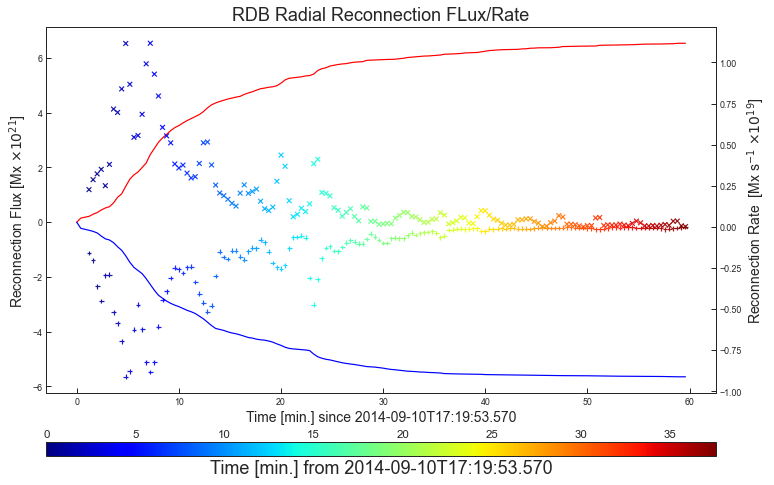

In [18]:
Image(""+ "recrateex.png") # path to where you have
                           # downloaded the 'recrateex.png' image

## Expore
- Feel free to create plots comparing some of the other variables included in the file, some of my ideas (do not need to answer them!): 
- How does the number of saturated pixels evolve over time? 
- What is the relationship between the reconnected flux and ribbon area? 
- What percentage of the active active region is accounted fro 